<h1> Big network </h1> 
Date: 16/2/2023
$\newline$

Is bigger really better? 
Let's try the simplest neural network with a lot more epochs

In [9]:
import myfunctions as mf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
from scipy.optimize import curve_fit
import time

In [2]:
# load data
rootfile = uproot.open("./stage1_clusters_bigdata.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
# cut data into right shape as in "SimplestNetwork"

xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit)

In [4]:
# create input data
clusters5x5, coord, x_edge, y_edge = mf.form_cluster(xMC_train, yMC_train, EMC_train)

This took  215.76568627357483 s


/nfs/freenas/tuph/e18/project/compass/analysis/saumiller/ecal/stage1/myfunctions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return arr_cluster, np.array(c_sys), np.array(edge_x), np.array(edge_y)


In [7]:
clusters = clusters5x5.reshape((clusters5x5.shape[0], 25))
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord)

In [6]:
model = keras.Sequential([layers.Input(shape=(25)),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.0005))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [10]:
a = time.time()
fit_hist = model.fit(clusters, training, batch_size=50, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
10353/10353 [==============================] - 20s 2ms/step - loss: 24.7184 - val_loss: 2.7033
Epoch 2/200
10353/10353 [==============================] - 19s 2ms/step - loss: 1.7812 - val_loss: 1.0614
Epoch 3/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.6008 - val_loss: 0.3380
Epoch 4/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.3215 - val_loss: 0.2801
Epoch 5/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.2264 - val_loss: 0.1893
Epoch 6/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1902 - val_loss: 0.1711
Epoch 7/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1695 - val_loss: 0.1532
Epoch 8/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1597 - val_loss: 0.1773
Epoch 9/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1551 - val_loss: 0.1427
Epoch 10/200
10353/10353 [===================

10353/10353 [==============================] - 19s 2ms/step - loss: 0.1128 - val_loss: 0.1143
Epoch 78/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1117 - val_loss: 0.1086
Epoch 79/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1127 - val_loss: 0.1043
Epoch 80/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1114 - val_loss: 0.1257
Epoch 81/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1121 - val_loss: 0.1123
Epoch 82/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1123 - val_loss: 0.1097
Epoch 83/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1117 - val_loss: 0.1180
Epoch 84/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1115 - val_loss: 0.1137
Epoch 85/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1109 - val_loss: 0.1092
Epoch 86/200
10353/10353 [========================

10353/10353 [==============================] - 19s 2ms/step - loss: 0.1072 - val_loss: 0.1319
Epoch 154/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1070 - val_loss: 0.1103
Epoch 155/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1070 - val_loss: 0.1065
Epoch 156/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1075 - val_loss: 0.1066
Epoch 157/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1075 - val_loss: 0.1109
Epoch 158/200
10353/10353 [==============================] - 18s 2ms/step - loss: 0.1075 - val_loss: 0.1183
Epoch 159/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1078 - val_loss: 0.1150
Epoch 160/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1064 - val_loss: 0.1061
Epoch 161/200
10353/10353 [==============================] - 19s 2ms/step - loss: 0.1067 - val_loss: 0.1078
Epoch 162/200
10353/10353 [===============

In [11]:
keras.models.save_model(model, 'stage1_simpestNN_200epochs')

INFO:tensorflow:Assets written to: stage1_simpestNN_200epochs/assets


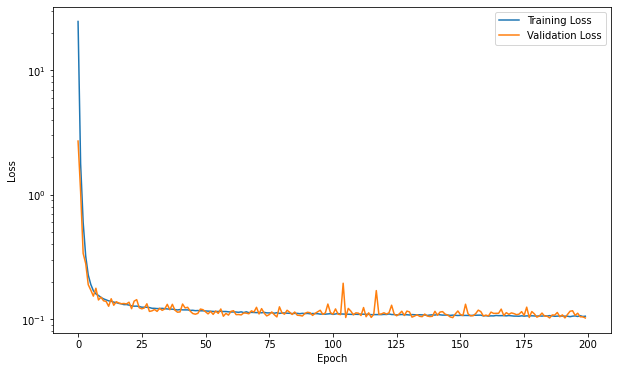

In [14]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [15]:
clusters5x5_v, coord_v, x_edge_v, y_edge_v = mf.form_cluster(xMC_veri, yMC_veri, EMC_veri)
clusters_v = clusters5x5_v.reshape((clusters5x5_v.shape[0], 25))

This took  55.710262298583984 s


/nfs/freenas/tuph/e18/project/compass/analysis/saumiller/ecal/stage1/myfunctions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return arr_cluster, np.array(c_sys), np.array(edge_x), np.array(edge_y)


In [16]:
output = model.predict(clusters_v)

In [17]:
# prep data
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

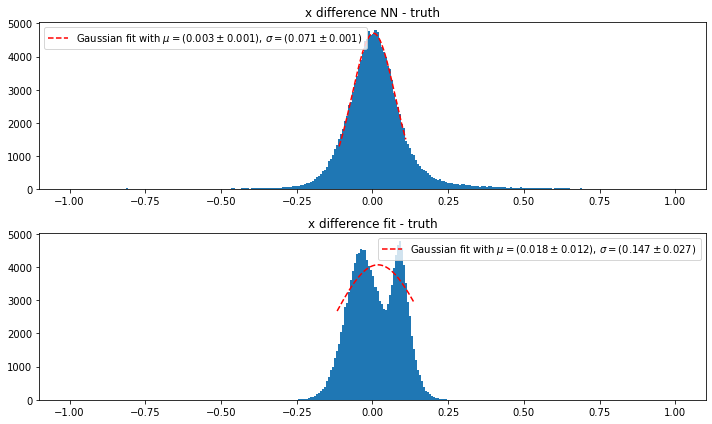

(array([3.46103093e-03, 7.05535023e-02, 8.31501394e+02]),
 array([5.11626322e-04, 6.79156628e-04, 6.43319962e+00]),
 array([1.81612826e-02, 1.47285352e-01, 1.50095889e+03]),
 array([1.16233843e-02, 2.74563406e-02, 2.33778820e+02]))

In [19]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x", bins=300)

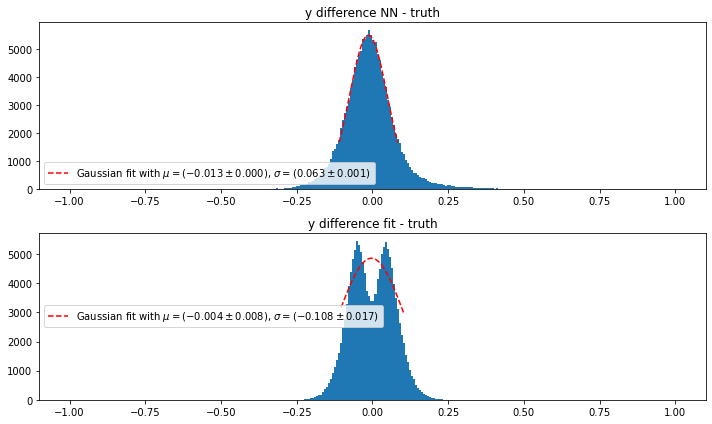

(array([-1.34740636e-02,  6.25962976e-02,  8.61709728e+02]),
 array([4.82521155e-04, 6.41889765e-04, 7.09928248e+00]),
 array([-3.59438498e-03, -1.07906288e-01,  1.31565629e+03]),
 array([7.84213157e-03, 1.66472648e-02, 1.65005444e+02]))

In [20]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

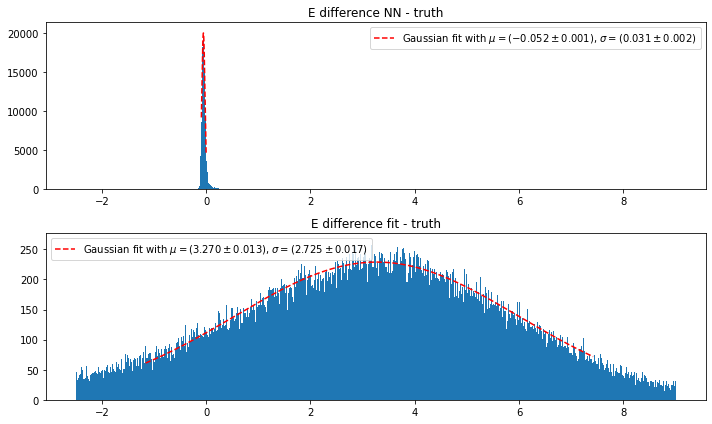

(array([-5.22149746e-02,  3.08873213e-02,  1.55230156e+03]),
 array([1.31504688e-03, 1.68822541e-03, 6.87907801e+01]),
 array([   3.2696807 ,    2.72493759, 1563.2565595 ]),
 array([0.01290007, 0.01738669, 7.99624934]))

In [21]:
mf.histo_output(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E", range_x=(-2.5,9), bins=1000)

<h2> summary </h2>

This is the outcome of training 200 epochs instead of 50:

| (x/y/E) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simplest model 50 epochs | 0.107 / 0.070 / 0.081 | 0.071 / 0.066 / 0.054 |
| simplest model 200 epochs | 0.003 / 0.013 / 0.052| 0.071 / 0.063 / 0.031 |

One can see that the mean get's significantly better but the width of the Gaussian stays the same.